In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
import os
import pandas as pd

root_directory = "/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset"
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split the data
all_data = []

for label in os.listdir(root_directory):
    label_path = os.path.join(root_directory, label)
    for image_filename in os.listdir(label_path):
        image_path = os.path.join(label_path, image_filename)
        all_data.append((image_path, label))

# Split the data into train and test sets
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
# Create a generator for the training set
x_train = train_datagen.flow_from_dataframe(
    pd.DataFrame(train_data, columns=['Image_Path', 'Label']),
    x_col='Image_Path',
    y_col='Label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

# Create a generator for the test set
x_test = test_datagen.flow_from_dataframe(
    pd.DataFrame(test_data, columns=['Image_Path', 'Label']),
    x_col='Image_Path',
    y_col='Label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Set shuffle to False for the test set
)

Found 759 validated image filenames belonging to 4 classes.
Found 175 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 749 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 202 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
x_train.class_indices

{'High Risk Level : ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
 'Low Risk Level : ECG Images of Patient that have History of MI (172x12=2064)': 1,
 'Medium Risk Level : ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
 'Normal Person ECG Images (284x12=3408)': 3}

Second Aalysis for Image

In [ ]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=imread('/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset/Low Risk Level : ECG Images of Patient that have History of MI (172x12=2064)/PMI(10).jpg')

ax0.imshow(image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

#plotting lead 1-12
fig , ax = plt.subplots(4,3)

fig.set_size_inches(20, 20)

x_counter=0
y_counter=0


for x,y in enumerate(Leads[:len(Leads)-1]):
  if (x+1)%3==0:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    y_counter+=1

#plot the image
plt.show()

Output hidden; open in https://colab.research.google.com to view.

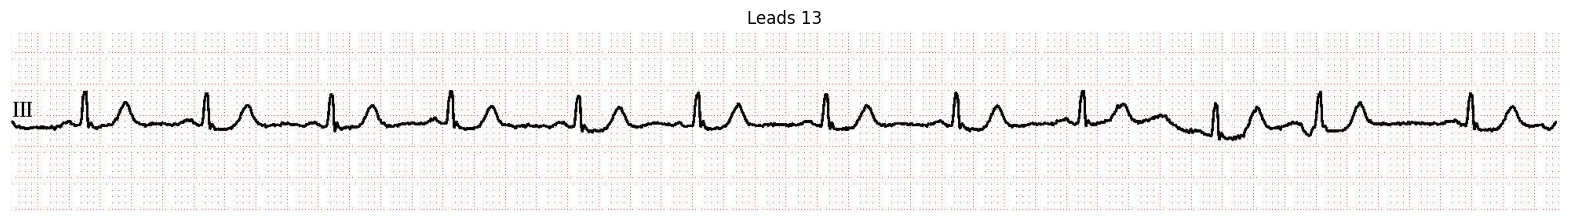

In [ ]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

ax1.imshow(Lead_13)
ax1.set_title("Leads 13")
ax1.axis('off')
plt.show()

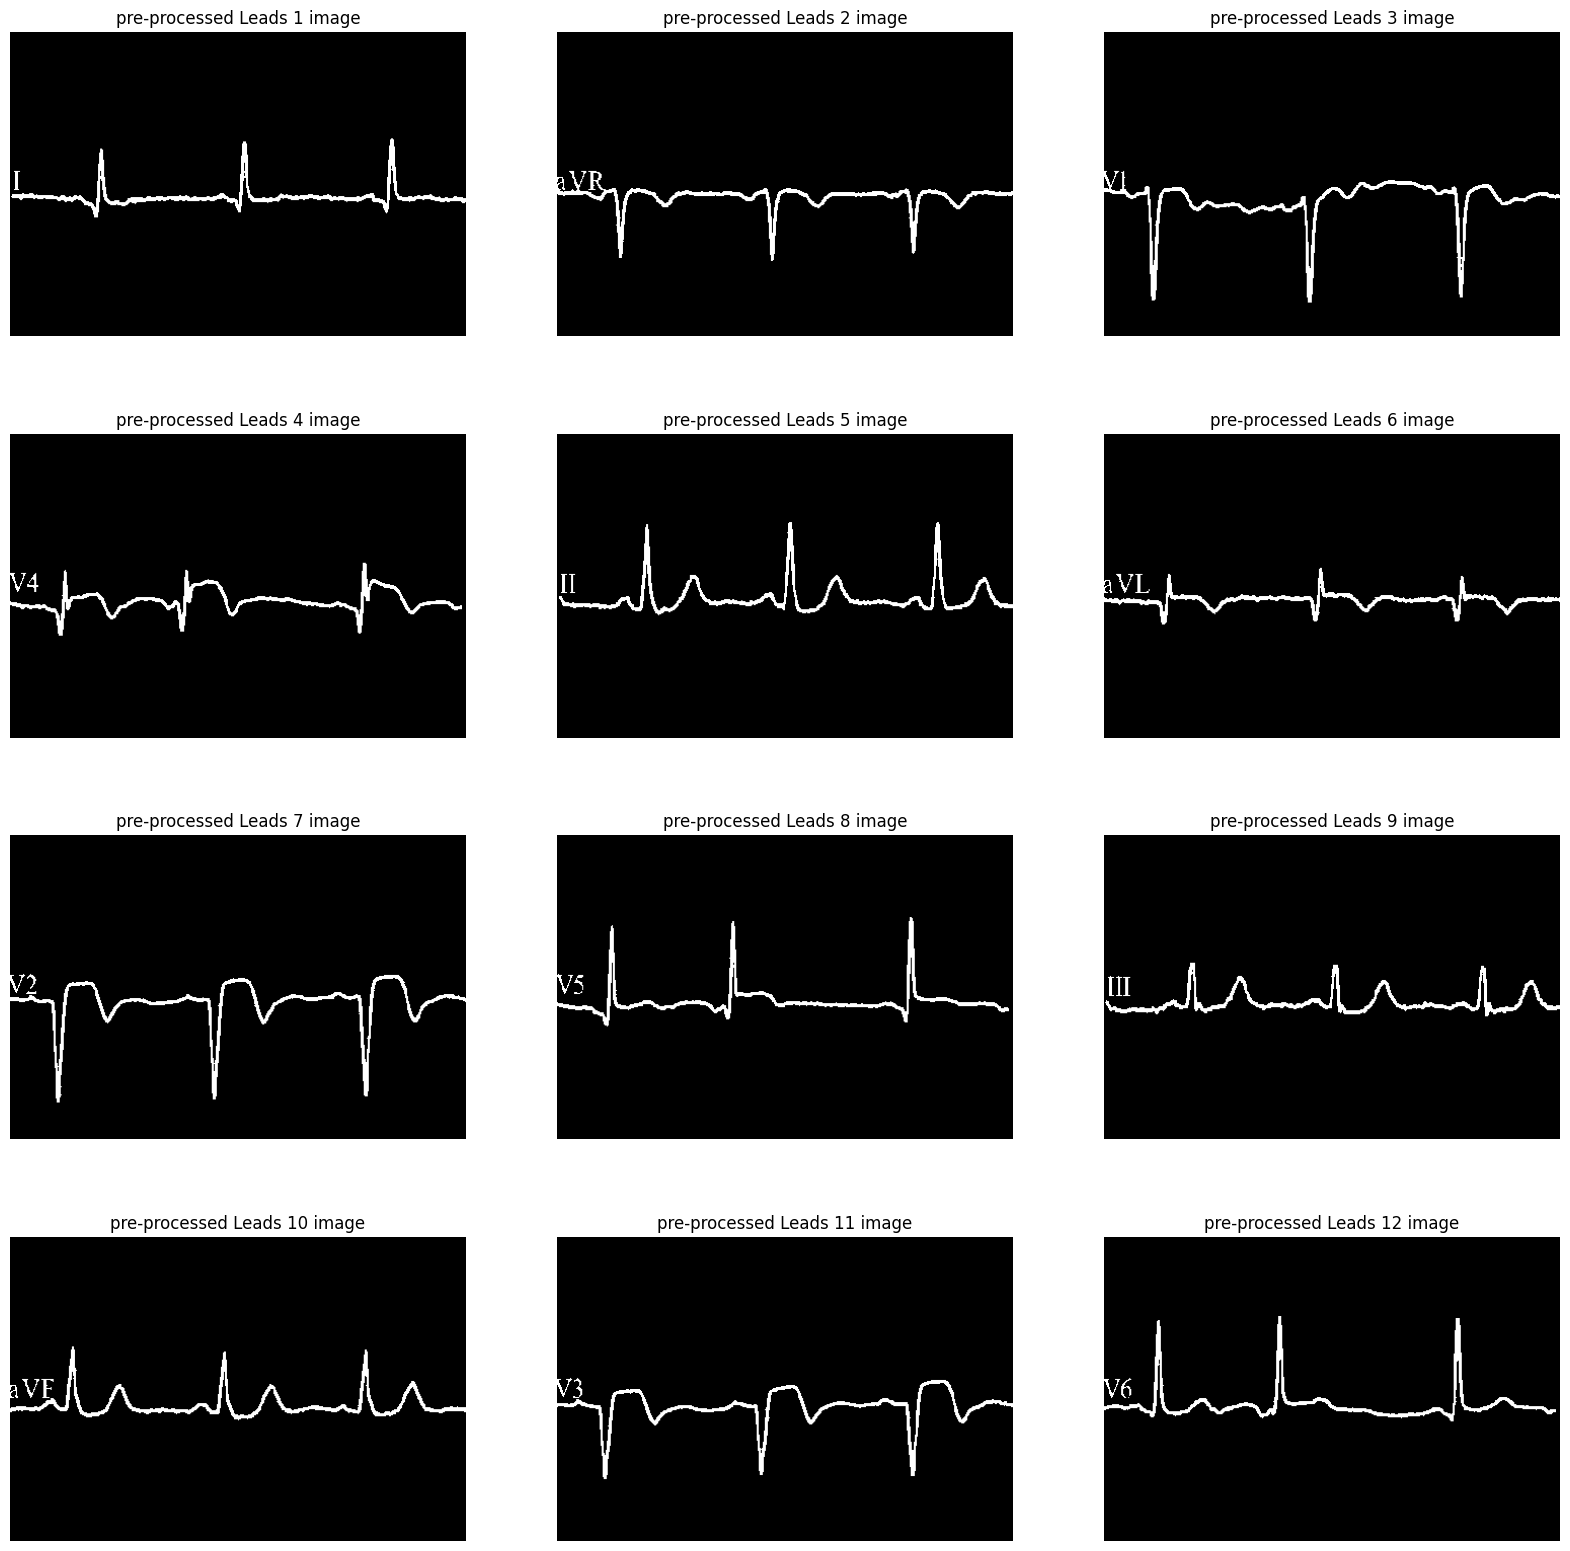

In [ ]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray

#creating subplot of size(4,3) 4 rows and 3 columns
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

#setting counter for plotting based on value
x_counter=0
y_counter=0


#looping through image list containg all leads from 1-12
for x,y in enumerate(Leads[:len(Leads)-1]):
  #converting to gray scale
  grayscale = color.rgb2gray(y)
  #smoothing image
  blurred_image = gaussian(grayscale, sigma=0.7)
  #thresholding to distinguish foreground and background
  #using otsu thresholding for getting threshold value
  global_thresh = threshold_otsu(blurred_image)

  #creating binary image based on threshold
  binary_global = blurred_image < global_thresh
  #resize image
  binary_global = resize(binary_global, (300, 450))

  if (x+1)%3==0:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    y_counter+=1

#plot the image
plt.show()

0.558607722085976


(-0.5, 484.5, 299.5, -0.5)

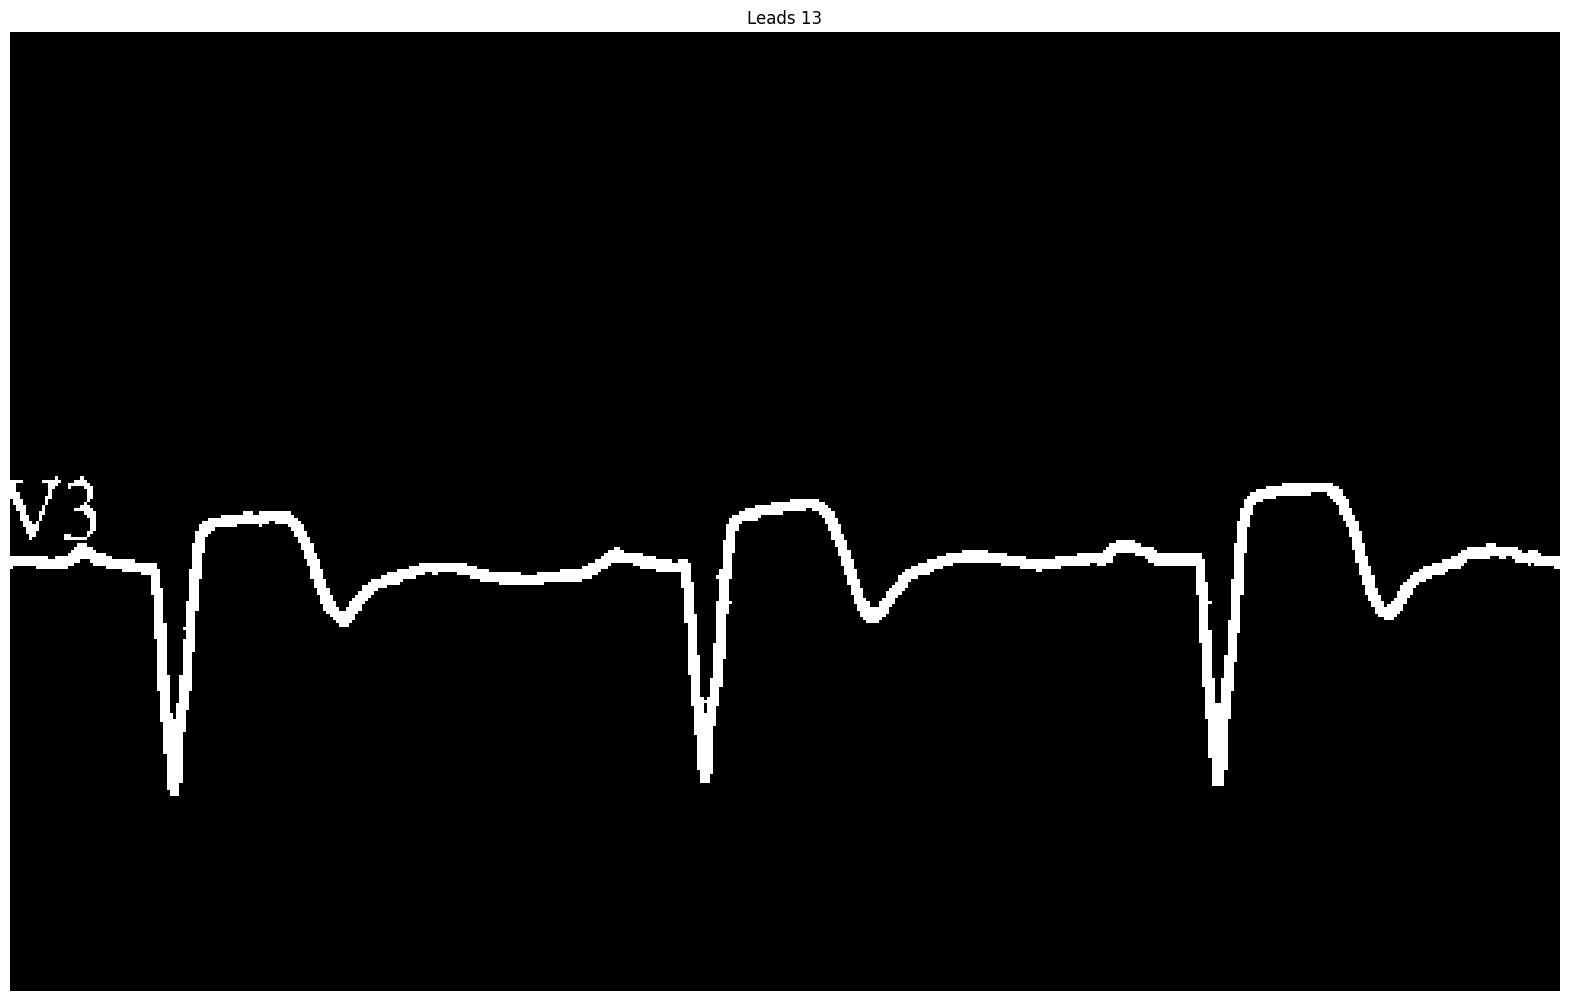

In [ ]:

#plotting lead 13
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_11)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 13")
ax3.axis('off')

[(1171, 2)]


Text(0.5, 1.0, 'Sample pre-processed Leads 13 image')

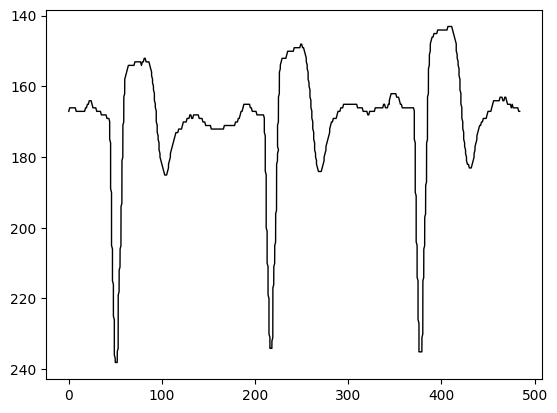

In [ ]:

#import measure
from skimage import measure
import scipy.ndimage as ndimage

#finding contour
contours = measure.find_contours(binary_global,0.9)

# Shows the image with contours found
fig4, ax4 = plt.subplots()

plt.gca().invert_yaxis()

contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
print(contours_shape)
for contour in contours:
  if contour.shape in contours_shape:
    test = resize(contour, (255, 2))
    ax4.plot(contour[:, 1], contour[:, 0],linewidth=1,color='black')
ax1.axis('image')
ax1.set_title("Sample pre-processed Leads 13 image")

In [ ]:
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]
contours_shape

[(1171, 2), (1037, 2), (56, 2)]

In [ ]:

test.shape

(255, 2)

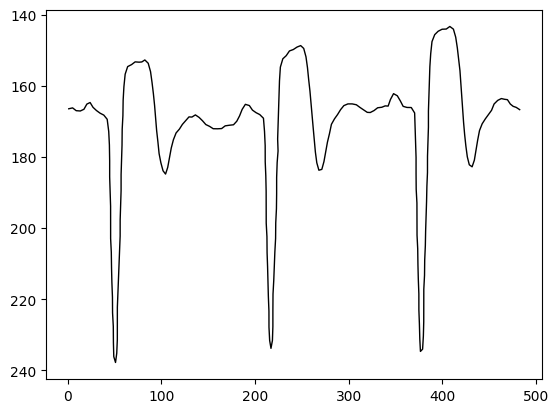

In [ ]:
#converting image to signal

#import pandas
import pandas as pd

#convert contour to dataframe
df = pd.DataFrame(test, columns = ['X','Y'])
fig5, ax5 = plt.subplots()

plt.gca().invert_yaxis()

#plot the image
ax5.plot(df['Y'],df['X'],linewidth=1,color='black',linestyle='solid')

#save the image
fig5.savefig('Lead13_Signal.png')

In [ ]:

#convert to CSV
df.to_csv('data.csv',index=False)

#View CSV data for verification
test_df=pd.read_csv('data.csv')
test_df

,X,Y
0,166.716326,482.479950
1,166.073776,478.728281
2,165.784937,475.517960
3,165.148808,472.512344
4,163.912946,469.416317
...,...,...
250,166.612597,17.450106
251,167.095052,13.557970
252,167.006354,9.170741
253,166.221048,5.335706


In [ ]:
#scaling the data and testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fit_transform_data = scaler.fit_transform(df)
Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
Normalized_Scaled


,X,Y
0,0.247516,1.000000
1,0.240714,0.992204
2,0.237656,0.985533
3,0.230922,0.979287
4,0.217839,0.972853
...,...,...
250,0.246418,0.033649
251,0.251525,0.025561
252,0.250586,0.016444
253,0.242273,0.008475


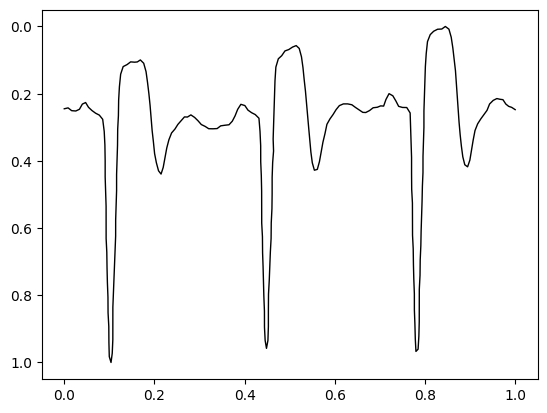

In [ ]:
import pandas as pd

df = pd.DataFrame(Normalized_Scaled, columns = ['X','Y'])

fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(Normalized_Scaled['Y'],Normalized_Scaled['X'],linewidth=1,color='black',linestyle='solid')

In [ ]:

#scaled_data to CSV
Normalized_Scaled.to_csv('scaled_data.csv',index=False)
#reading CSV to test
test_scaled_df=pd.read_csv('scaled_data.csv')
test_scaled_df

,X,Y
0,0.247516,1.000000
1,0.240714,0.992204
2,0.237656,0.985533
3,0.230922,0.979287
4,0.217839,0.972853
...,...,...
250,0.246418,0.033649
251,0.251525,0.025561
252,0.250586,0.016444
253,0.242273,0.008475


In [ ]:
# For now save the X axis as a seperate csv file (1D) as it seems to corresponds the high and low points and y axis corresponds to curve/shape.
#scaled_data to CSV
Normalized_Scaled['X'].to_csv('scaled_data_X.csv',index=False)
#reading CSV to test
test_scaled_df_X=pd.read_csv('scaled_data_X.csv')
test_scaled_df_X.shape

(255, 1)

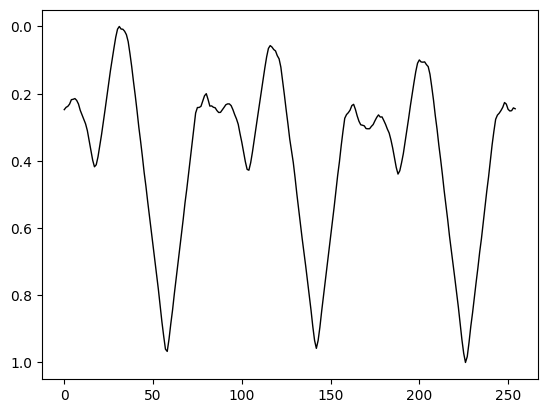

In [ ]:
#plotting 1D signal
import pandas as pd

test_plot_df = pd.DataFrame(test_scaled_df_X, columns = ['X'])
fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(test_plot_df,linewidth=1,color='black',linestyle='solid')

In [ ]:
#transpose the 1D scaled dataframe
test_transpose = test_scaled_df_X.T
test_transpose

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
X,0.247516,0.240714,0.237656,0.230922,0.217839,0.216693,0.214547,0.219961,0.230682,0.249462,...,0.258068,0.250137,0.240603,0.226339,0.231017,0.246418,0.251525,0.250586,0.242273,0.244934


In [ ]:
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))

    extract_signal_leads(Leads,folder_name,parent_folder)

In [ ]:
#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

    #set fig size
    #fig1.set_size_inches(20, 20)

    #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh

    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)

In [ ]:
def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)


In [3]:
import os
import re
from skimage.filters import threshold_otsu,gaussian
from skimage import measure
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from skimage.io import imread
from skimage import color
from skimage.transform import resize
from numpy import asarray
import matplotlib.pyplot as plt

"""#### **NOW WE HAVE BOTH CSV FILES AND CROPPED LEAD IMAGES(1-13) TO WORK ON. WE CAN PERFROM CNN on 1D images & 2D images and perform different Supervised classification algorithms based on CSV DATA(KNN, LOGISTIC REGRESSION, SVM etc. and also different clustering techniques without target to check predictions**

### **NOW PERFORM DATA PREPROCESSING/FEATURE EXTRACTION ON  ALL THE FILES IN THE ECG_IMAGES FOLDER**

#### **FUNCTION TO EXTRACT IMAGE LEADS(1-13) (FEATURE EXTRACTION)**
"""

"""####**FUNCTIONS FOR CSV CONVERSION AND SCALING**"""

#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

    #set fig size
    #fig1.set_size_inches(20, 20)

    #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh

    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)

"""#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING**"""
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))

    extract_signal_leads(Leads,folder_name,parent_folder)


def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

#load the different types of folders
normal_parent_dir = '/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset/Normal Person ECG Images (284x12=3408)/'
abnormal_parent_dir = '/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset/Medium Risk Level : ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
MI_parent_dir = '/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset/High Risk Level : ECG Images of Myocardial Infarction Patients (240x12=2880)'
MI_history_parent_dir = '/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset/Low Risk Level : ECG Images of Patient that have History of MI (172x12=2064)'

#Types of heart. Now taking only 3. will work on COVID-19 later
Types_ECG = {'Abnormal_hear_beat':abnormal_parent_dir,'MI':MI_parent_dir,'History_MI':MI_history_parent_dir,'Normal':normal_parent_dir}

#Types_ECG_test = {'Abnormal':abnormal_parent_dir}

#### parse all the files in the different folders and peform all the above steps as mentioned in the analysis Sample.

#loop through folder/files and create seperate images of different leads
for types,folder in Types_ECG.items():
  for files in os.listdir(folder):
    #if files.endswith(".jpg"):
    with open(os.path.join(folder, files), 'r') as f:
      Convert_Image_Lead(files,folder)


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Data Sets for Research Project/ECG Dataset/Medium Risk Level : ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(15)'

PHASE 02

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import os
from natsort import natsorted

#creating list to store file_names
NORMAL_=[]
MI_=[]
PMI_=[]
HB_=[]

normal = '/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/Normal'
abnormal = '/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/AHB'
MI = '/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/MI'
MI_history = '/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/PMI'

Types_ECG = {'normal':normal,'Abnormal_hear_beat':abnormal,'MI':MI,'History_MI':MI_history}

for types,folder in Types_ECG.items():
  for files in os.listdir(folder):
    if types=='normal':
      NORMAL_.append(files)
    elif types=='Abnormal_hear_beat':
      HB_.append(files)
    elif types=='MI':
      MI_.append(files)
    elif types=='History_MI':
      PMI_.append(files)

In [ ]:
NORMAL_.sort()
NORMAL_

['scaled_data_1D_1.csv',
 'scaled_data_1D_10.csv',
 'scaled_data_1D_11.csv',
 'scaled_data_1D_12.csv',
 'scaled_data_1D_13.csv',
 'scaled_data_1D_2.csv',
 'scaled_data_1D_3.csv',
 'scaled_data_1D_4.csv',
 'scaled_data_1D_5.csv',
 'scaled_data_1D_6.csv',
 'scaled_data_1D_7.csv',
 'scaled_data_1D_8.csv',
 'scaled_data_1D_9.csv']

In [ ]:
HB_.sort()
HB_

['scaled_data_1D_1.csv',
 'scaled_data_1D_10.csv',
 'scaled_data_1D_11.csv',
 'scaled_data_1D_12.csv',
 'scaled_data_1D_13.csv',
 'scaled_data_1D_2.csv',
 'scaled_data_1D_3.csv',
 'scaled_data_1D_4.csv',
 'scaled_data_1D_5.csv',
 'scaled_data_1D_6.csv',
 'scaled_data_1D_7.csv',
 'scaled_data_1D_8.csv',
 'scaled_data_1D_9.csv']

In [ ]:
for x in range(len(MI_)):
  df1=pd.read_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/Normal/{}'.format(NORMAL_[x]))
  df2=pd.read_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/AHB/{}'.format(HB_[x]))
  df3=pd.read_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/MI/{}'.format(MI_[x]))
  df4=pd.read_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Extracted Features/PMI/{}'.format(PMI_[x]))
  final_df = pd.concat([df1,df2,df3,df4],ignore_index=True)
  final_df.to_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Combined Graphs/Combined_IDLead_{}.csv'.format(x+1))

In [ ]:
import pandas as pd
import numpy as np
import os
from natsort import natsorted

In [ ]:
#now reading just lead1
df=pd.read_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Combined Graphs/Combined_IDLead_1.csv')
df['Target'].unique()

array(['No', 'HB', 'MI', 'PM'], dtype=object)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#convert Target column values as Numeric using ngroups
encode_target_label = df.groupby('Target').ngroup().rename("target").to_frame()
test_final  = df.merge(encode_target_label, left_index=True, right_index=True)
test_final.drop(columns=['Target'],inplace=True)
test_final

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,target
0,0.917753,0.924369,0.873765,0.791381,0.699513,0.604927,0.500312,0.446012,0.528910,0.634068,...,0.200676,0.300147,0.407225,0.507346,0.605953,0.699309,0.790334,0.856593,0.849957,2
1,0.728449,0.680755,0.619010,0.645367,0.681570,0.732488,0.758448,0.750660,0.728282,0.707928,...,0.637260,0.664539,0.667226,0.637064,0.593287,0.545503,0.515049,0.563257,0.633581,2
2,0.822643,0.851932,0.830764,0.741948,0.641310,0.537874,0.436175,0.441703,0.545023,0.643225,...,0.065451,0.162277,0.267585,0.366791,0.476903,0.578419,0.682183,0.769689,0.777848,2
3,0.840295,0.862679,0.867447,0.866768,0.855714,0.850410,0.845623,0.844074,0.845580,0.815941,...,0.790635,0.794866,0.788999,0.795804,0.798033,0.805313,0.811174,0.803028,0.778651,2
4,0.977755,0.965117,0.944680,0.913039,0.874137,0.825506,0.759093,0.715088,0.736386,0.793030,...,0.669627,0.634239,0.657633,0.721284,0.775203,0.816333,0.860214,0.887024,0.893431,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.829815,0.832084,0.852396,0.909665,0.988242,1.000000,0.923323,0.821865,0.721302,0.612039,...,0.429721,0.531567,0.642137,0.742063,0.833042,0.814867,0.777622,0.760714,0.759294,3
932,0.792668,0.816124,0.819960,0.820956,0.848039,0.881028,0.902311,0.878898,0.839736,0.812651,...,0.738519,0.779926,0.805944,0.782872,0.751734,0.741883,0.719459,0.715210,0.691764,3
933,0.989427,0.995024,0.976988,0.969345,0.983175,0.988435,0.945285,0.864721,0.757819,0.643776,...,0.710505,0.819059,0.908218,0.938991,0.927317,0.919958,0.920884,0.936588,0.925665,3
934,0.682510,0.682286,0.641051,0.620212,0.608210,0.576331,0.603596,0.645714,0.677964,0.720297,...,0.452247,0.450421,0.439278,0.439086,0.394417,0.441650,0.473909,0.539199,0.547146,3


In [ ]:
# Now Perform Dimensionality reduction (PCA) on that Dataframe and check
from sklearn.decomposition import PCA

#do PCA and choose componeents as 100
pca = PCA(n_components=100)
x_pca = pca.fit_transform(test_final.iloc[:,0:-1])
x_pca = pd.DataFrame(x_pca)

# Calculate the variance explained by priciple components
explained_variance = pca.explained_variance_ratio_
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

#store the new pca generated dimensions in a dataframe
pca_df = pd.DataFrame(data = x_pca)
target = pd.Series(test_final['target'], name='target')
result_df = pd.concat([pca_df, target], axis=1)
result_df

Variance of each component: [2.11743223e-01 8.42486671e-02 7.38076907e-02 6.47263961e-02
 4.53926412e-02 4.06157319e-02 3.53127534e-02 3.05264273e-02
 2.81816625e-02 2.69351831e-02 2.46081512e-02 2.31281296e-02
 2.29285600e-02 2.05032430e-02 1.92857703e-02 1.79530381e-02
 1.58624644e-02 1.49588807e-02 1.42534239e-02 1.27609990e-02
 1.23906943e-02 1.10641160e-02 1.03179983e-02 9.94545153e-03
 9.07051879e-03 8.29989993e-03 7.73974320e-03 7.01074164e-03
 6.44720279e-03 6.27844492e-03 5.75174905e-03 5.69723924e-03
 5.09021928e-03 4.66300828e-03 4.47451977e-03 4.12644574e-03
 3.97272136e-03 3.74787887e-03 3.33085379e-03 2.99152611e-03
 2.80028493e-03 2.66710603e-03 2.37875842e-03 2.28866138e-03
 2.16271597e-03 2.06314898e-03 1.97014000e-03 1.77388993e-03
 1.57137181e-03 1.41254788e-03 1.37214840e-03 1.26678107e-03
 1.08389519e-03 1.00414465e-03 9.21709098e-04 8.57794241e-04
 7.70643004e-04 7.34899631e-04 6.50877344e-04 6.48848109e-04
 6.13086264e-04 5.80936371e-04 5.68796821e-04 4.98251600e

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,-0.717211,0.463603,-1.431867,-0.417774,-0.706343,-1.402227,0.563563,-0.618025,-0.579934,0.156183,...,-0.020634,-0.033874,-0.015320,0.050614,-0.028238,0.003287,-0.026692,0.026397,0.010025,2
1,0.785906,-0.880169,0.628034,-0.299699,-0.306704,-0.120163,-0.108284,-0.271465,-0.417094,0.671336,...,0.067869,0.000757,-0.017802,0.019061,0.028332,-0.007607,0.011612,0.037146,0.020607,2
2,-1.557882,-0.486153,-1.253992,1.710573,-0.076273,0.417085,-0.501662,0.360031,-0.304631,0.008327,...,-0.054732,-0.003607,0.045533,0.034697,-0.004782,-0.021797,-0.000160,0.025362,-0.020378,2
3,-1.670419,-1.404130,1.223427,-0.718865,-0.305416,-0.893526,-0.232145,0.007542,0.245521,-0.825447,...,0.014281,0.030314,-0.008134,-0.035942,-0.014671,-0.016419,-0.006179,-0.036052,-0.018860,2
4,-0.560113,-0.768918,1.137860,-0.606123,-0.641104,-0.883752,0.129092,1.376718,-0.195248,-0.610405,...,-0.028458,0.008736,-0.005475,0.007437,0.005006,-0.004755,0.024253,-0.054457,-0.021447,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,-1.261904,-0.729304,-1.205276,0.088870,-0.189265,0.104615,0.750302,-0.001885,-0.110715,-0.276268,...,0.002317,-0.015887,-0.067881,0.016095,0.042161,-0.072067,0.028156,-0.023029,-0.048941,3
932,-1.653361,-1.312726,0.244851,0.090415,0.375561,-0.133659,-0.026906,0.129001,0.183143,0.146219,...,0.046608,0.020438,-0.045350,0.078780,-0.023000,-0.032886,0.044817,-0.049705,-0.005674,3
933,-1.635972,0.008237,-0.937963,0.297275,-0.235601,0.494701,0.834142,-1.659689,-1.053170,0.723502,...,-0.014119,0.019874,-0.036309,-0.023871,-0.042419,-0.005139,0.038617,0.009139,-0.011333,3
934,0.163738,-0.285187,-0.387083,-0.511030,-0.036056,0.123565,-0.434123,0.259529,-0.619665,0.270019,...,-0.031395,0.114101,-0.026168,-0.079607,0.022764,0.037831,0.031366,-0.000573,-0.019279,3


In [ ]:
# Combining All in a single csv
location= '/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Combined Graphs/'
for files in natsorted(os.listdir(location)):
  if files.endswith(".csv") and not files.endswith("13.csv"):
    if files!='Combined_IDLead_1.csv':
      df=pd.read_csv('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset/Combined Graphs/{}'.format(files))
      df.drop(columns=['Unnamed: 0'],inplace=True)
      test_final=pd.concat([test_final,df],axis=1,ignore_index=True)
      test_final.drop(columns=test_final.columns[-1],axis=1,inplace=True)

#drop the target column
test_final.drop(columns=[255],axis=1,inplace=True)
test_final

,0,1,2,3,4,5,6,7,8,9,...,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060
0,0.917753,0.924369,0.873765,0.791381,0.699513,0.604927,0.500312,0.446012,0.528910,0.634068,...,0.399912,0.380722,0.439726,0.505585,0.561864,0.578131,0.566146,0.547663,0.538773,0.527560
1,0.728449,0.680755,0.619010,0.645367,0.681570,0.732488,0.758448,0.750660,0.728282,0.707928,...,0.864067,0.849256,0.854949,0.861380,0.875514,0.868763,0.847450,0.805689,0.751761,0.702102
2,0.822643,0.851932,0.830764,0.741948,0.641310,0.537874,0.436175,0.441703,0.545023,0.643225,...,0.965300,0.948357,0.925020,0.937132,0.950613,0.949321,0.951291,0.944140,0.941881,0.938145
3,0.840295,0.862679,0.867447,0.866768,0.855714,0.850410,0.845623,0.844074,0.845580,0.815941,...,0.880043,0.883833,0.870995,0.861323,0.864892,0.863552,0.839506,0.805486,0.801828,0.826618
4,0.977755,0.965117,0.944680,0.913039,0.874137,0.825506,0.759093,0.715088,0.736386,0.793030,...,0.914934,0.832980,0.744065,0.664111,0.636316,0.709106,0.791480,0.874416,0.930151,0.910234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.829815,0.832084,0.852396,0.909665,0.988242,1.000000,0.923323,0.821865,0.721302,0.612039,...,0.913404,0.968015,0.992614,0.945789,0.876660,0.808906,0.741645,0.736615,0.797729,0.855637
932,0.792668,0.816124,0.819960,0.820956,0.848039,0.881028,0.902311,0.878898,0.839736,0.812651,...,0.516381,0.521133,0.521142,0.521143,0.522801,0.543166,0.549073,0.564977,0.576139,0.576267
933,0.989427,0.995024,0.976988,0.969345,0.983175,0.988435,0.945285,0.864721,0.757819,0.643776,...,0.805457,0.812536,0.838735,0.843769,0.834978,0.837061,0.834374,0.865242,0.905599,0.903532
934,0.682510,0.682286,0.641051,0.620212,0.608210,0.576331,0.603596,0.645714,0.677964,0.720297,...,0.860939,0.824976,0.783459,0.761391,0.741917,0.770631,0.802701,0.821503,0.846300,0.858795


In [ ]:
#write the file to csv
test_final.to_csv('final_1D.csv',header=False,index=False)

In [ ]:
# Now Perform Dimensionality reduction (PCA) on that Dataframe and check
from sklearn.decomposition import PCA

#do PCA and choose componeents as 400
pca = PCA(n_components=400)
x_pca = pca.fit_transform(test_final)
x_pca = pd.DataFrame(x_pca)

# Calculate the variance explained by priciple components
explained_variance = pca.explained_variance_ratio_
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

#store the new pca generated dimensions in a dataframe
#store the new pca generated dimensions in a dataframe
pca_df = pd.DataFrame(data = x_pca)
target = pd.Series(result_df.iloc[:,-1], name='target')
final_result_df = pd.concat([pca_df, target], axis=1)
final_result_df

Variance of each component: [9.34795136e-02 5.84115502e-02 4.54492918e-02 3.16549795e-02
 2.77978694e-02 2.37806340e-02 1.88550769e-02 1.76257622e-02
 1.65045364e-02 1.50584873e-02 1.47453477e-02 1.40802819e-02
 1.37367843e-02 1.31723321e-02 1.26328466e-02 1.18037259e-02
 1.11290400e-02 1.08137141e-02 1.02576620e-02 9.87786662e-03
 9.63869033e-03 9.37059501e-03 9.20628928e-03 8.83002673e-03
 8.70375734e-03 8.48194110e-03 8.34473374e-03 8.29809055e-03
 7.74851720e-03 7.49232250e-03 7.33013450e-03 7.09604902e-03
 6.93981601e-03 6.73027813e-03 6.59146174e-03 6.58040474e-03
 6.45854904e-03 6.38601862e-03 6.26393070e-03 5.93487822e-03
 5.61437598e-03 5.56342460e-03 5.37584578e-03 5.28111134e-03
 5.25973404e-03 5.11565227e-03 5.05747952e-03 4.97813870e-03
 4.84370443e-03 4.62174127e-03 4.56964638e-03 4.43066512e-03
 4.29281862e-03 4.16784302e-03 4.07225956e-03 4.04295532e-03
 3.95560183e-03 3.94850259e-03 3.83525126e-03 3.72220506e-03
 3.67485581e-03 3.65671660e-03 3.53638248e-03 3.47645902e

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,target
0,-4.612230,-3.750396,-1.940953,-1.674998,-0.717035,0.326586,-2.118831,1.949460,0.127448,-1.082832,...,-0.002637,0.095875,-0.018643,-0.076351,0.042150,0.072683,0.109384,-0.036134,0.043629,2
1,-2.351187,-1.076048,-0.039874,-0.668531,0.614169,0.179414,-1.932501,2.533290,-1.223068,1.117992,...,-0.103722,-0.145497,0.173919,-0.007526,0.033421,0.177465,0.016442,0.018689,0.127541,2
2,-4.074060,-5.104913,-0.804317,2.955453,-1.281480,0.676337,-0.192284,0.830972,-0.155368,-0.023891,...,0.357505,-0.181254,-0.216496,-0.036120,0.336038,-0.089444,-0.062047,0.171084,-0.139200,2
3,-4.812396,-4.711500,0.172719,-1.036118,-0.628640,0.498288,-1.848136,4.314267,0.043716,-0.058385,...,-0.116596,0.014897,0.021547,-0.134915,-0.118374,-0.079609,-0.361458,0.058383,0.042153,2
4,-3.712261,-0.605304,0.267107,-1.765668,2.049663,1.395010,1.125218,1.185961,0.289161,-0.607715,...,0.003910,-0.084859,0.058482,0.182759,-0.110170,-0.091708,-0.017770,0.020547,-0.279719,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,-2.557786,-6.665587,0.322617,-2.061011,1.510999,2.657915,2.353725,1.483102,0.801112,1.178448,...,-0.031173,0.091597,0.090521,-0.041505,-0.362400,-0.225824,-0.051614,0.061115,-0.032664,3
932,-3.991461,7.143452,-2.482947,3.017608,-3.489945,2.926425,-0.812790,-1.286790,-0.230304,-0.504484,...,-0.090130,-0.009093,-0.064192,0.149340,-0.023023,0.158142,0.098329,0.132821,0.220951,3
933,-6.324489,-0.036787,-0.490420,-1.961577,0.440081,-1.497315,-0.275775,-0.318130,-0.050210,0.076822,...,0.050622,-0.074869,0.091340,0.035776,-0.086620,-0.036846,0.168132,-0.058855,0.044167,3
934,-0.393920,-1.823177,1.244701,5.603378,2.156373,-1.652756,-2.394359,-0.375613,-0.494864,0.888585,...,-0.031548,-0.020861,-0.029047,-0.298108,-0.005228,0.082596,0.078087,-0.058270,0.034554,3


KNN APPROCH

In [ ]:
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('knn', KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# have paased less range value of hyperparamter since i'm using free tier version of google colab.
k_range = list(range(1, 30))
parameters = dict(knn__n_neighbors=k_range)

#input
X = pd.read_csv('final_1D.csv',header=None)

#target
y=final_result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#increasing cv score takes lot of time in gooogle colab, so kept it just 2.
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

Knn_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
print("Accuracy: {}".format(Knn_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9573333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        97
           2       0.90      0.96      0.93       114
           3       0.93      0.81      0.86        62

    accuracy                           0.96       375
   macro avg       0.96      0.94      0.95       375
weighted avg       0.96      0.96      0.96       375

Tuned Model Parameters: {'knn__n_neighbors': 1}


LOGISTIC REGRESSION

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('lr', LogisticRegression())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

#input
X = pd.read_csv('final_1D.csv',header=None)

#target
y=final_result_df.iloc[:,-1]

#parameters for gridsearchcv
c_space = np.logspace(-4, 4, 10)
parameters = {'lr__C': c_space,'lr__penalty': ['l2']}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#call GridSearchCV and set crossvalscore to 2
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
LR_Accuracy = cv.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(LR_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9626666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        97
           2       0.93      0.95      0.94       114
           3       0.90      0.87      0.89        62

    accuracy                           0.96       375
   macro avg       0.96      0.95      0.96       375
weighted avg       0.96      0.96      0.96       375

Tuned Model Parameters: {'lr__C': 0.046415888336127774, 'lr__penalty': 'l2'}


SVM

In [ ]:
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline
steps = [('SVM', SVC())]

pipeline = Pipeline(steps)

#input
X = pd.read_csv('final_1D.csv',header=None)

#target
y=final_result_df.iloc[:,-1]

# Specify the hyperparameter space, if we increase the penalty(c) and gamma value the accurancy can be increased.
#since it takes lots of time in google colab provided only a single value
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=21)

cv = GridSearchCV(pipeline,parameters,cv=3)
cv.fit(X_train,y_train)

y_pred = cv.predict(X_test)
SVM_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
SVM_Accuracy=cv.score(X_test, y_test)

print("Accuracy: {}".format(SVM_Accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.9273504273504274
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       126
           2       0.83      0.96      0.89       142
           3       0.90      0.65      0.76        81

    accuracy                           0.93       468
   macro avg       0.93      0.90      0.91       468
weighted avg       0.93      0.93      0.92       468



In [ ]:
# Import the necessary modules for ML model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
#input
X = pd.read_csv('final_1D.csv',header=None)

#target
y=final_result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

knn =  KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

joblib_file='/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/model_test.pkl'
joblib.dump(knn,joblib_file)

# KNN JOBLIB
# joblib_file='/content/model_ecg.joblib'
# joblib.dump(knn,joblib_file)

['/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/model_test.pkl']

TESTING

In [ ]:
%%writefile final_app.py
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt
import streamlit as st
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray
from skimage.metrics import structural_similarity
from skimage import measure
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os
from natsort import natsorted

uploaded_file = st.file_uploader("Choose a file")

if uploaded_file is not None:
  image=imread(uploaded_file)
  image_gray = color.rgb2gray(image)
  image_gray=resize(image_gray,(1572,2213))
  """#### **UPLOADED ECG IMAGE**"""

  #checkign if we parse the user image and similar to our format
  image1=imread('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/Test/Abnormal/HB(29).jpg')
  image1 = color.rgb2gray(image1)
  image1=resize(image1,(1572,2213))

  image2=imread('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/Test/Abnormal/HB(5).jpg')
  image2 = color.rgb2gray(image2)
  image2=resize(image2,(1572,2213))

  image3=imread('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/Test/ECG Images of Myocardial Infarction Patients/MI(2).jpg')
  image3 = color.rgb2gray(image3)
  image3=resize(image2,(1572,2213))

  image4=imread('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/Test/ECG Images of Myocardial Infarction Patients/MI(29).jpg')
  image4 = color.rgb2gray(image4)
  image4=resize(image2,(1572,2213))

  similarity_score=max(structural_similarity(image_gray,image1),structural_similarity(image_gray,image2),structural_similarity(image_gray,image3),structural_similarity(image_gray,image4))

  if similarity_score > 0.70:
    st.image(image)
    """#### **GRAY SCALE IMAGE**"""
    my_expander = st.expander(label='Gray SCALE IMAGE')
    with my_expander:
      st.image(image_gray)
    """#### **DIVIDING LEADS**"""
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1625]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1625]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1625]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]
    #plotting lead 1-12
    fig , ax = plt.subplots(4,3)
    fig.set_size_inches(10, 10)
    x_counter=0
    y_counter=0

    for x,y in enumerate(Leads[:len(Leads)-1]):
      if (x+1)%3==0:
        ax[x_counter][y_counter].imshow(y)
        ax[x_counter][y_counter].axis('off')
        ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
        x_counter+=1
        y_counter=0
      else:
        ax[x_counter][y_counter].imshow(y)
        ax[x_counter][y_counter].axis('off')
        ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
        y_counter+=1

    fig.savefig('Leads_1-12_figure.png')
    fig1 , ax1 = plt.subplots()
    fig1.set_size_inches(10, 10)
    ax1.imshow(Lead_13)
    ax1.set_title("Leads 13")
    ax1.axis('off')
    fig1.savefig('Long_Lead_13_figure.png')
    my_expander1 = st.expander(label='DIVIDING LEAD')
    with my_expander1:
      st.image('Leads_1-12_figure.png')
      st.image('Long_Lead_13_figure.png')

    """#### **PREPROCESSED LEADS**"""
    fig2 , ax2 = plt.subplots(4,3)
    fig2.set_size_inches(10, 10)
    #setting counter for plotting based on value
    x_counter=0
    y_counter=0

    for x,y in enumerate(Leads[:len(Leads)-1]):
      #converting to gray scale
      grayscale = color.rgb2gray(y)
      #smoothing image
      blurred_image = gaussian(grayscale, sigma=0.9)
      #thresholding to distinguish foreground and background
      #using otsu thresholding for getting threshold value
      global_thresh = threshold_otsu(blurred_image)

      #creating binary image based on threshold
      binary_global = blurred_image < global_thresh
      #resize image
      binary_global = resize(binary_global, (300, 450))
      if (x+1)%3==0:
        ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
        ax2[x_counter][y_counter].axis('off')
        ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
        x_counter+=1
        y_counter=0
      else:
        ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
        ax2[x_counter][y_counter].axis('off')
        ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
        y_counter+=1
    fig2.savefig('Preprossed_Leads_1-12_figure.png')

    #plotting lead 13
    fig3 , ax3 = plt.subplots()
    fig3.set_size_inches(10, 10)
    #converting to gray scale
    grayscale = color.rgb2gray(Lead_13)
    #smoothing image
    blurred_image = gaussian(grayscale, sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)
    print(global_thresh)
    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh
    ax3.imshow(binary_global,cmap='gray')
    ax3.set_title("Leads 13")
    ax3.axis('off')
    fig3.savefig('Preprossed_Leads_13_figure.png')

    my_expander2 = st.expander(label='PREPROCESSED LEAD')
    with my_expander2:
      st.image('Preprossed_Leads_1-12_figure.png')
      st.image('Preprossed_Leads_13_figure.png')

    """#### **EXTRACTING SIGNALS(1-13)**"""
    fig4 , ax4 = plt.subplots(4,3)
    fig4.set_size_inches(10, 10)
    x_counter=0
    y_counter=0
    for x,y in enumerate(Leads[:len(Leads)-1]):
      #converting to gray scale
      grayscale = color.rgb2gray(y)
      #smoothing image
      blurred_image = gaussian(grayscale, sigma=0.9)
      #thresholding to distinguish foreground and background
      #using otsu thresholding for getting threshold value
      global_thresh = threshold_otsu(blurred_image)

      #creating binary image based on threshold
      binary_global = blurred_image < global_thresh
      #resize image
      binary_global = resize(binary_global, (300, 450))
      #finding contours
      contours = measure.find_contours(binary_global,0.8)
      contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
      for contour in contours:
        if contour.shape in contours_shape:
          test = resize(contour, (255, 2))
      if (x+1)%3==0:
        ax4[x_counter][y_counter].invert_yaxis()
        ax4[x_counter][y_counter].plot(test[:, 1], test[:, 0],linewidth=1,color='black')
        ax4[x_counter][y_counter].axis('image')
        ax4[x_counter][y_counter].set_title("Contour {} image".format(x+1))
        x_counter+=1
        y_counter=0
      else:
        ax4[x_counter][y_counter].invert_yaxis()
        ax4[x_counter][y_counter].plot(test[:, 1], test[:, 0],linewidth=1,color='black')
        ax4[x_counter][y_counter].axis('image')
        ax4[x_counter][y_counter].set_title("Contour {} image".format(x+1))
        y_counter+=1

      #scaling the data and testing
      lead_no=x
      scaler = MinMaxScaler()
      fit_transform_data = scaler.fit_transform(test)
      Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
      Normalized_Scaled=Normalized_Scaled.T
      #scaled_data to CSV
      Normalized_Scaled.to_csv('Scaled_1DLead_{lead_no}.csv'.format(lead_no=lead_no+1),index=False)

    fig4.savefig('Contour_Leads_1-12_figure.png')
    my_expander3 = st.expander(label='CONOTUR LEADS')
    with my_expander3:
      st.image('Contour_Leads_1-12_figure.png')

    """#### **CONVERTING TO 1D SIGNAL**"""
    #lets try combining all 12 leads
    test_final=pd.read_csv('/content/Scaled_1DLead_1.csv')
    location= '/content/'
    for files in natsorted(os.listdir(location)):
      if files.endswith(".csv"):
        if files!='Scaled_1DLead_1.csv':
            df=pd.read_csv('/content/{}'.format(files))
            test_final=pd.concat([test_final,df],axis=1,ignore_index=True)

    st.write(test_final)
    """#### **PASS TO ML MODEL FOR PREDICTION**"""
    loaded_model = joblib.load('/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/model_test.pkl')
    result = loaded_model.predict(test_final)
    if result[0] == 0:
      st.write("You ECG corresponds to Myocardial Infarction")

    if result[0] == 1:
      st.write("You ECG corresponds to Abnormal Heartbeat")

    if result[0] == 2:
      st.write("Your ECG is Normal")

    if result[0] == 3:
      st.write("You ECG corresponds to History of Myocardial Infarction")

  else:
    st.write("Sorry Our App won't be able to parse this image format right now!!!. Pls check the image input sample section for supported images")

Writing final_app.py


In [ ]:
! streamlit run final_app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
npx: installed 22 in 6.616s
your url is: https://silent-tables-roll.loca.lt
^C


In [9]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, gaussian
from skimage.transform import resize
from skimage.metrics import structural_similarity
from skimage import measure
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os
from natsort import natsorted

def preprocess_image(image_path):
    image = imread(image_path)
    image_gray = color.rgb2gray(image)
    image_gray = resize(image_gray, (1572, 2213))

    image1 = imread('/content/drive/MyDrive/Research Models/ECG Image Recognition/Test/PMI/PMI(53).jpg')
    image1 = color.rgb2gray(image1)
    image1 = resize(image1, (1572, 2213))

    image2 = imread('/content/drive/MyDrive/Research Models/ECG Image Recognition/Test/Abnormal/HB(29).jpg')
    image2 = color.rgb2gray(image2)
    image2 = resize(image2, (1572, 2213))

    image3 = imread('/content/drive/MyDrive/Research Models/ECG Image Recognition/Test/Normal/Normal(14).jpg')
    image3 = color.rgb2gray(image3)
    image3 = resize(image3, (1572, 2213))

    image4 = imread('/content/drive/MyDrive/Research Models/ECG Image Recognition/Test/ECG Images of Myocardial Infarction Patients/MI(19).jpg')
    image4 = color.rgb2gray(image4)
    image4 = resize(image4, (1572, 2213))

    similarity_score = max(
        structural_similarity(image_gray, image1),
        structural_similarity(image_gray, image2),
        structural_similarity(image_gray, image3),
        structural_similarity(image_gray, image4)
    )

    if similarity_score > 0.70:
        plt.imshow(image)
        plt.show()

        # Dividing the ECG leads
        Lead_1 = image[300:600, 150:643]
        Lead_2 = image[300:600, 646:1135]
        Lead_3 = image[300:600, 1140:1625]
        Lead_4 = image[300:600, 1630:2125]
        Lead_5 = image[600:900, 150:643]
        Lead_6 = image[600:900, 646:1135]
        Lead_7 = image[600:900, 1140:1625]
        Lead_8 = image[600:900, 1630:2125]
        Lead_9 = image[900:1200, 150:643]
        Lead_10 = image[900:1200, 646:1135]
        Lead_11 = image[900:1200, 1140:1625]
        Lead_12 = image[900:1200, 1630:2125]
        Lead_13 = image[1250:1480, 150:2125]
        Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]
        #plotting lead 1-12
        fig , ax = plt.subplots(4,3)
        fig.set_size_inches(10, 10)
        x_counter=0
        y_counter=0

        for x,y in enumerate(Leads[:len(Leads)-1]):
          if (x+1)%3==0:
            ax[x_counter][y_counter].imshow(y)
            ax[x_counter][y_counter].axis('off')
            ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
            x_counter+=1
            y_counter=0
          else:
            ax[x_counter][y_counter].imshow(y)
            ax[x_counter][y_counter].axis('off')
            ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
            y_counter+=1

        fig.savefig('Leads_1-12_figure.png')
        fig1 , ax1 = plt.subplots()
        fig1.set_size_inches(10, 10)
        ax1.imshow(Lead_13)
        ax1.set_title("Leads 13")
        ax1.axis('off')
        fig1.savefig('Long_Lead_13_figure.png')

        # Preprocessing leads
        fig2 , ax2 = plt.subplots(4,3)
        fig2.set_size_inches(10, 10)
        #setting counter for plotting based on value
        x_counter=0
        y_counter=0

        for x,y in enumerate(Leads[:len(Leads)-1]):
          #converting to gray scale
          grayscale = color.rgb2gray(y)
          #smoothing image
          blurred_image = gaussian(grayscale, sigma=0.9)
          #thresholding to distinguish foreground and background
          #using otsu thresholding for getting threshold value
          global_thresh = threshold_otsu(blurred_image)

          #creating binary image based on threshold
          binary_global = blurred_image < global_thresh
          #resize image
          binary_global = resize(binary_global, (300, 450))
          if (x+1)%3==0:
            ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
            ax2[x_counter][y_counter].axis('off')
            ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
            x_counter+=1
            y_counter=0
          else:
            ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
            ax2[x_counter][y_counter].axis('off')
            ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
            y_counter+=1
        fig2.savefig('Preprossed_Leads_1-12_figure.png')

        #plotting lead 13
        fig3 , ax3 = plt.subplots()
        fig3.set_size_inches(10, 10)
        #converting to gray scale
        grayscale = color.rgb2gray(Lead_13)
        #smoothing image
        blurred_image = gaussian(grayscale, sigma=0.7)
        #thresholding to distinguish foreground and background
        #using otsu thresholding for getting threshold value
        global_thresh = threshold_otsu(blurred_image)
        print(global_thresh)
        #creating binary image based on threshold
        binary_global = blurred_image < global_thresh
        ax3.imshow(binary_global,cmap='gray')
        ax3.set_title("Leads 13")
        ax3.axis('off')
        fig3.savefig('Preprossed_Leads_13_figure.png')

        # Extracting signals
        fig4 , ax4 = plt.subplots(4,3)
        fig4.set_size_inches(10, 10)
        x_counter=0
        y_counter=0
        for x,y in enumerate(Leads[:len(Leads)-1]):
          #converting to gray scale
          grayscale = color.rgb2gray(y)
          #smoothing image
          blurred_image = gaussian(grayscale, sigma=0.9)
          #thresholding to distinguish foreground and background
          #using otsu thresholding for getting threshold value
          global_thresh = threshold_otsu(blurred_image)

          #creating binary image based on threshold
          binary_global = blurred_image < global_thresh
          #resize image
          binary_global = resize(binary_global, (300, 450))
          #finding contours
          contours = measure.find_contours(binary_global,0.8)
          contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
          for contour in contours:
            if contour.shape in contours_shape:
              test = resize(contour, (255, 2))
          if (x+1)%3==0:
            ax4[x_counter][y_counter].invert_yaxis()
            ax4[x_counter][y_counter].plot(test[:, 1], test[:, 0],linewidth=1,color='black')
            ax4[x_counter][y_counter].axis('image')
            ax4[x_counter][y_counter].set_title("Contour {} image".format(x+1))
            x_counter+=1
            y_counter=0
          else:
            ax4[x_counter][y_counter].invert_yaxis()
            ax4[x_counter][y_counter].plot(test[:, 1], test[:, 0],linewidth=1,color='black')
            ax4[x_counter][y_counter].axis('image')
            ax4[x_counter][y_counter].set_title("Contour {} image".format(x+1))
            y_counter+=1
          #scaling the data and testing
          lead_no=x
          scaler = MinMaxScaler()
          fit_transform_data = scaler.fit_transform(test)
          Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
          Normalized_Scaled=Normalized_Scaled.T
          #scaled_data to CSV
          Normalized_Scaled.to_csv('Scaled_1DLead_{lead_no}.csv'.format(lead_no=lead_no+1),index=False)

        fig4.savefig('Contour_Leads_1-12_figure.png')

        #lets try combining all 12 leads
        test_final=pd.read_csv('/content/Scaled_1DLead_1.csv')
        location= '/content/'
        for files in natsorted(os.listdir(location)):
          if files.endswith(".csv"):
            if files!='Scaled_1DLead_1.csv':
                df=pd.read_csv('/content/{}'.format(files))
                test_final=pd.concat([test_final,df],axis=1,ignore_index=True)

        # print(test_final)
        loaded_model = joblib.load('/content/drive/MyDrive/Research Models/ECG Image Recognition/model_test.pkl')
        result = loaded_model.predict(test_final)
        print("Predictions:")
        if result[0] == 0:
            print("You ECG corresponds to Abnormal Heartbeat")

        if result[0] == 1:
            print("You ECG corresponds to Myocardial Infarction")

        if result[0] == 2:
            print("Your ECG is Normal")

        if result[0] == 3:
            print("You ECG corresponds to History of Myocardial Infarction")
    else:
        print("Sorry, Our App won't be able to parse this image format right now!!! "
              "Please check the image input sample section for supported images")



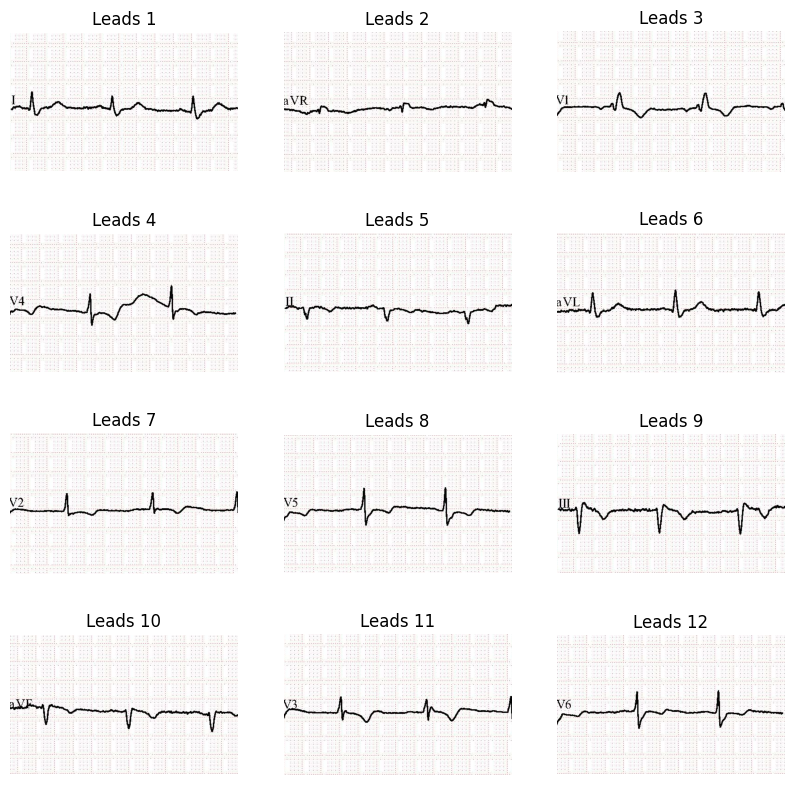

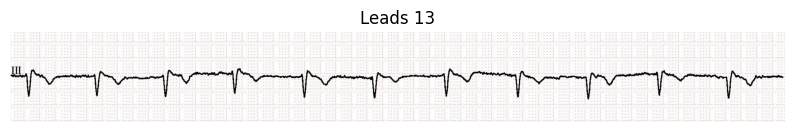

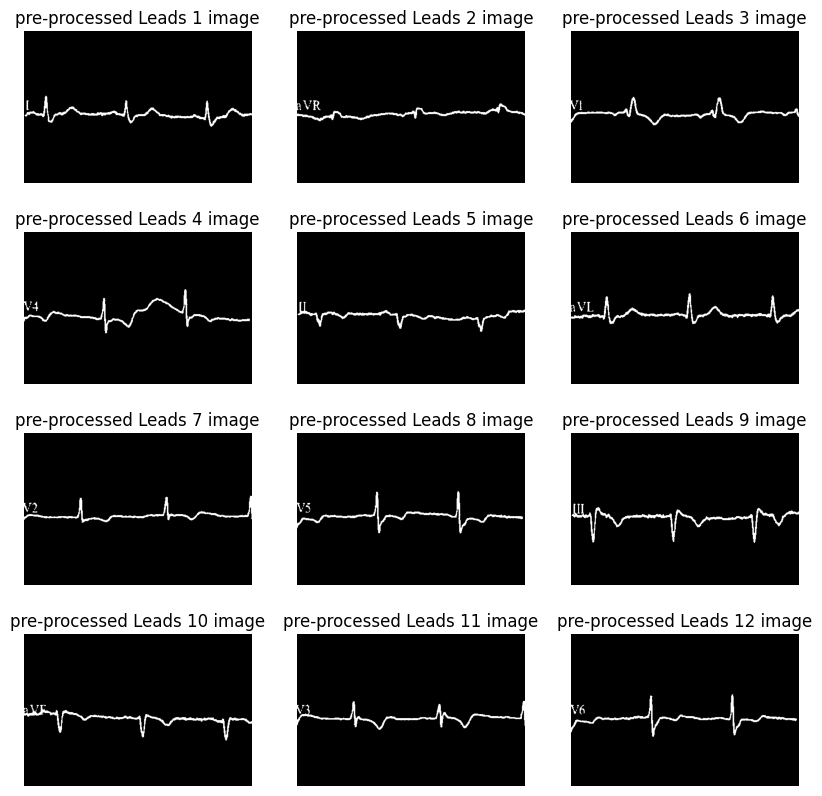

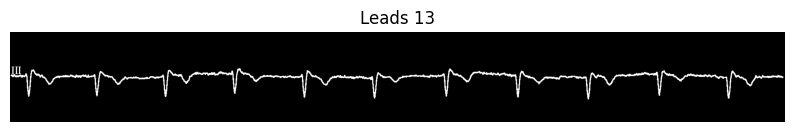

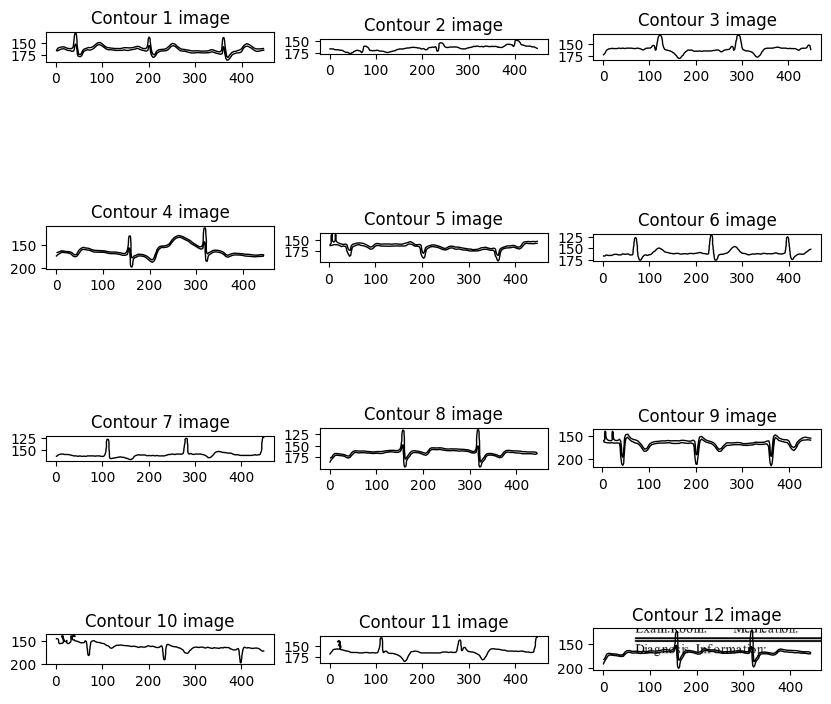

0.5536582591589642
Predictions:
Your ECG is Normal


In [20]:
image_path = '/content/drive/MyDrive/Research Models/ECG Image Recognition/Test/Abnormal/Normal(1).jpg'  # Replace with the actual path to your image file
preprocess_image(image_path)

COMBINED STRATEGY

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
from skimage.filters import threshold_otsu, gaussian
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_directory = "/content/drive/MyDrive/Heart App 2/models/ECG Image Recognition/ECG Dataset"

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split the data
all_data = []

for label in os.listdir(root_directory):
    label_path = os.path.join(root_directory, label)
    for image_filename in os.listdir(label_path):
        image_path = os.path.join(label_path, image_filename)
        all_data.append((image_path, label))

# Split the data into train and test sets
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)

# Create a generator for the training set
x_train = train_datagen.flow_from_dataframe(
    pd.DataFrame(train_data, columns=['Image_Path', 'Label']),
    x_col='Image_Path',
    y_col='Label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

# Create a generator for the test set
x_test = test_datagen.flow_from_dataframe(
    pd.DataFrame(test_data, columns=['Image_Path', 'Label']),
    x_col='Image_Path',
    y_col='Label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Set shuffle to False for the test set
)






Found 748 validated image filenames belonging to 4 classes.
Found 188 validated image filenames belonging to 4 classes.


In [ ]:
def preprocess_ecg_image(image_path):
    # Load the image
    image = imread(image_path)

    # Extract ECG leads
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1625]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1625]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1625]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    # Preprocess each lead
    processed_leads = []
    for lead in Leads:
        # Convert to grayscale
        grayscale = color.rgb2gray(lead)

        # Smooth the image
        blurred_image = gaussian(grayscale, sigma=0.7)

        # Thresholding using Otsu's method
        global_thresh = threshold_otsu(blurred_image)
        binary_global = blurred_image < global_thresh

        # Resize image
        binary_global = resize(binary_global, (300, 450))

        processed_leads.append(binary_global)

    return processed_leads

def visualize_preprocessed_images(processed_leads):
    fig, ax = plt.subplots(1, len(processed_leads))
    fig.set_size_inches(20, 20)

    for x, y in enumerate(processed_leads):
        ax[x].imshow(y, cmap="gray")
        ax[x].axis('off')
        ax[x].set_title(f"Preprocessed Leads {x + 1}")

    plt.show()


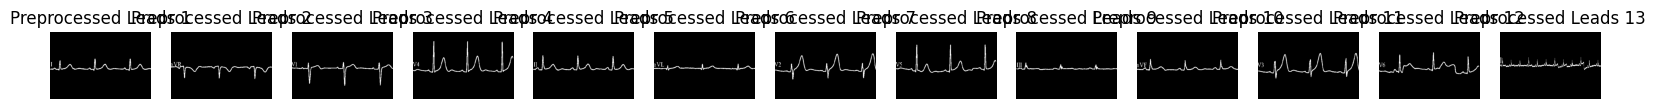

In [ ]:
image_path = x_train.filepaths[0]  # Assuming x_train is your generator
processed_leads = preprocess_ecg_image(image_path)
visualize_preprocessed_images(processed_leads)

In [ ]:
x_train.class_indices

{'High Risk Level : ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
 'Low Risk Level : ECG Images of Patient that have History of MI (172x12=2064)': 1,
 'Medium Risk Level : ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
 'Normal Person ECG Images (284x12=3408)': 3}

MODEL LAYERS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# CONVOLUTIONAL LAYERS
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation="relu", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# DENSE LAYERS
model.add(Dense(units=256, kernel_initializer="random_uniform", activation="relu"))
model.add(Dense(units=128, kernel_initializer="random_uniform", activation="relu"))
model.add(Dense(units=64, kernel_initializer="random_uniform", activation="relu"))
model.add(Dense(units=4, kernel_initializer="random_uniform", activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can train the model using your generator
model.fit(x_train, epochs=10, validation_data=x_test)


Epoch 1/10


UnimplementedError: ignored